In [2]:
from SGD import *

sgd = SGD(learning_rate=0.05)
sgd.train(xtrain, ytrain, batch_size=10, epoch_count=20)

Epoch: 0. Total error: 7.049880970787065
Epoch: 1. Total error: 3.10260124716219
Epoch: 2. Total error: 2.43406126852308
Epoch: 3. Total error: 2.115432638522957
Epoch: 4. Total error: 1.039244470061191
Epoch: 5. Total error: 1.0528290098179502
Epoch: 6. Total error: 1.0158446318463281
Epoch: 7. Total error: 1.5083161826124678
Epoch: 8. Total error: 3.5064360236424377
Epoch: 9. Total error: 0.6871442836381345
Epoch: 10. Total error: 1.0666330569816733
Epoch: 11. Total error: 1.584456010147803
Epoch: 12. Total error: 1.0193125077170138
Epoch: 13. Total error: 1.7824202701226233
Epoch: 14. Total error: 1.4456244143990955
Epoch: 15. Total error: 1.1146396086211632
Epoch: 16. Total error: 1.5672736538721466
Epoch: 17. Total error: 2.295380012308468
Epoch: 18. Total error: 1.779366241274387
Epoch: 19. Total error: 1.8815356674568087


In [3]:
sgd.weight

array([ 0.11641274,  0.91723467, -1.20484223])

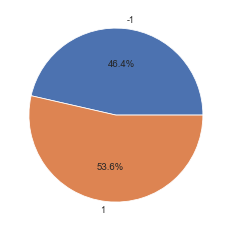

100%|██████████| 50/50 [00:00<00:00, 443.67it/s]


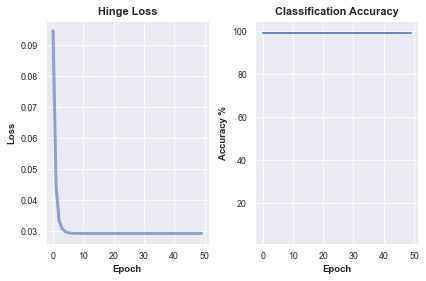

In [27]:
## Dataset tiny
import seaborn as sns

sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set_context('paper')

import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()

counts = dict()
for x in np.unique(ytrain).astype(int):
    counts[x] = np.count_nonzero(ytrain == x)

plt.pie(x=counts.values(), labels=counts.keys(), autopct='%1.1f%%')
plt.show() # roughly balanced data set

svm = LinearSVM(lr=0.5, C=0.001, max_iters=50, show_plot=False, batch_size=20)
svm.fit(xtrain, ytrain)

plt.subplot(1,2,1)
plt.title("Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(svm.losses, lw=3, alpha=0.6)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(svm.accuracies * 100, lw=2, alpha=0.8)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")
plt.ylim(min(svm.accuracies), 105)

plt.tight_layout()
plt.show()

█████| 100/100 [00:00<00:00, 522.23it/s]

100%|██████████| 100/100 [00:00<00:00, 536.19it/s]

100%|██████████| 100/100 [00:00<00:00, 511.57it/s]

100%|██████████| 100/100 [00:00<00:00, 501.34it/s]

100%|██████████| 100/100 [00:00<00:00, 481.78it/s]

100%|██████████| 100/100 [00:00<00:00, 582.75it/s]

100%|██████████| 100/100 [00:00<00:00, 593.07it/s]

100%|██████████| 100/100 [00:00<00:00, 523.90it/s]

100%|██████████| 100/100 [00:00<00:00, 593.10it/s]

100%|██████████| 100/100 [00:00<00:00, 615.16it/s]

100%|██████████| 100/100 [00:00<00:00, 511.57it/s]

100%|██████████| 100/100 [00:00<00:00, 618.94it/s]

100%|██████████| 100/100 [00:00<00:00, 577.87it/s]

100%|██████████| 100/100 [00:00<00:00, 618.94it/s]

100%|██████████| 100/100 [00:00<00:00, 618.93it/s]

100%|██████████| 100/100 [00:00<00:00, 574.56it/s]

100%|██████████| 100/100 [00:00<00:00, 596.83it/s]

100%|██████████| 100/100 [00:00<00:00, 563.30it/s]

100%|██████████| 100/100 [00:00<00:00, 615.14it/s]

100%|██████████| 100/1

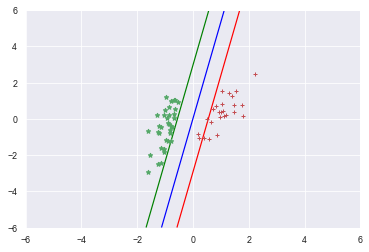

In [18]:
from pprint import pprint
from CV import cross_validation_score

lrs = [0.01, 0.1, 0.5, 1, 3]; Cs = [0.001, 0.01, 0.1, 0.5, 1]
batch_sizes = [10, 20, 30, 40]
results = {}

for lr in tqdm(lrs):
    for C in Cs:
        for batch in batch_sizes:
            svm = LinearSVM(lr=lr, C=C, batch_size=batch)
            results[f'lr:{lr}, C:{C}, batch:{batch}'] = cross_validation_score(svm, xtrain, ytrain, k=5)

results = sorted(results.items(), key=lambda l:l[1], reverse=True)
pprint(results[:5])

# best hyperparameters
lr = 0.5; C = 0.01
svm = LinearSVM(lr=lr, C=C)
svm.fit(xtrain, ytrain)

# classification accuracy
print(svm.accuracy(np.c_[xtest, np.ones(xtest.shape[0])], ytest))
svm.plot_margin(np.c_[xtest, np.ones(xtest.shape[0])], ytest)

In [19]:
results

[('lr:0.1, C:0.001, batch:10', 0.9928571428571429),
 ('lr:0.1, C:0.01, batch:10', 0.9928571428571429),
 ('lr:0.1, C:0.1, batch:10', 0.9928571428571429),
 ('lr:0.5, C:0.001, batch:10', 0.9928571428571429),
 ('lr:0.5, C:0.001, batch:20', 0.9928571428571429),
 ('lr:0.5, C:0.001, batch:30', 0.9928571428571429),
 ('lr:0.5, C:0.01, batch:10', 0.9928571428571429),
 ('lr:0.5, C:0.01, batch:20', 0.9928571428571429),
 ('lr:0.5, C:0.01, batch:30', 0.9928571428571429),
 ('lr:0.5, C:0.1, batch:10', 0.9928571428571429),
 ('lr:0.5, C:0.1, batch:20', 0.9928571428571429),
 ('lr:0.5, C:0.1, batch:30', 0.9928571428571429),
 ('lr:1, C:0.001, batch:10', 0.9928571428571429),
 ('lr:1, C:0.001, batch:20', 0.9928571428571429),
 ('lr:1, C:0.001, batch:30', 0.9928571428571429),
 ('lr:1, C:0.001, batch:40', 0.9928571428571429),
 ('lr:1, C:0.01, batch:10', 0.9928571428571429),
 ('lr:1, C:0.01, batch:20', 0.9928571428571429),
 ('lr:1, C:0.01, batch:30', 0.9928571428571429),
 ('lr:1, C:0.01, batch:40', 0.99285714285

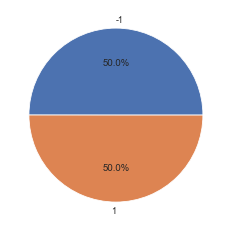

100%|██████████| 5/5 [00:09<00:00,  1.82s/it]


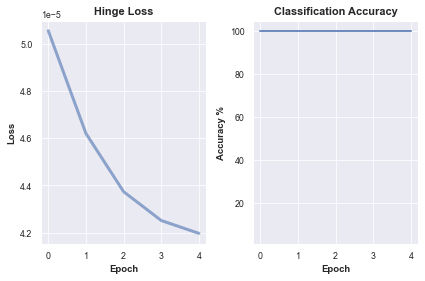

In [28]:
## Dataset large

import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_large()

counts = dict()
for x in np.unique(ytrain).astype(int):
    counts[x] = np.count_nonzero(ytrain == x)

plt.pie(x=counts.values(), labels=counts.keys(), autopct='%1.1f%%')
plt.show() # roughly balanced data set

svm = LinearSVM(lr=5, C=0.1, max_iters=5, show_plot=False, batch_size=200)
svm.fit(xtrain, ytrain, tqdm_toggle=True)

plt.subplot(1,2,1)
plt.title("Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(svm.losses, lw=3, alpha=0.6)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(svm.accuracies * 100, lw=2, alpha=0.8)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")
plt.ylim(min(svm.accuracies), 105)

plt.tight_layout()
plt.show()

In [22]:
from pprint import pprint
from CV import cross_validation_score

lrs = [0.01, 0.5, 1]; Cs = [0.001, 0.01, 0.1]
batch_sizes = [50, 100, 200]
results = {}

for lr in tqdm(lrs):
    for C in Cs:
        for batch in batch_sizes:
            svm = LinearSVM(lr=lr, C=C, batch_size=batch, max_iters=3)
            results[f'lr:{lr}, C:{C}, batch:{batch}'] = cross_validation_score(svm, xtrain, ytrain, k=5)
            
results = sorted(results.items(), key=lambda l:l[1], reverse=True)
pprint(results[:5])

# best hyperparameters
lr = 0.5; C = 0.01
svm = LinearSVM(lr=lr, C=C, batch_size=200, max_iters=5)
svm.fit(xtrain, ytrain)

# classification accuracy
print(svm.accuracy(np.c_[xtest, np.ones(xtest.shape[0])], ytest))

it]
100%|██████████| 3/3 [00:04<00:00,  1.53s/it]

100%|██████████| 3/3 [00:04<00:00,  1.46s/it]

100%|██████████| 3/3 [00:04<00:00,  1.47s/it]

100%|██████████| 3/3 [00:04<00:00,  1.52s/it]

100%|██████████| 3/3 [00:04<00:00,  1.53s/it]

100%|██████████| 3/3 [00:04<00:00,  1.52s/it]

100%|██████████| 3/3 [00:04<00:00,  1.48s/it]

100%|██████████| 3/3 [00:04<00:00,  1.49s/it]

100%|██████████| 3/3 [00:04<00:00,  1.45s/it]

100%|██████████| 3/3 [00:04<00:00,  1.46s/it]

100%|██████████| 3/3 [00:04<00:00,  1.48s/it]

100%|██████████| 3/3 [00:04<00:00,  1.48s/it]

100%|██████████| 3/3 [00:04<00:00,  1.48s/it]

100%|██████████| 3/3 [00:04<00:00,  1.48s/it]

100%|██████████| 3/3 [00:04<00:00,  1.49s/it]

100%|██████████| 3/3 [00:04<00:00,  1.46s/it]

100%|██████████| 3/3 [00:04<00:00,  1.44s/it]

100%|██████████| 3/3 [00:04<00:00,  1.49s/it]

100%|██████████| 3/3 [00:04<00:00,  1.45s/it]

100%|██████████| 3/3 [00:04<00:00,  1.50s/it]

100%|██████████| 3/3 [00:04<00:00,  1.47s/it]

100%|████

In [23]:
results

[('lr:0.01, C:0.001, batch:50', 1.0),
 ('lr:0.01, C:0.001, batch:100', 1.0),
 ('lr:0.01, C:0.001, batch:200', 1.0),
 ('lr:0.01, C:0.01, batch:50', 1.0),
 ('lr:0.01, C:0.01, batch:100', 1.0),
 ('lr:0.01, C:0.01, batch:200', 1.0),
 ('lr:0.01, C:0.1, batch:50', 1.0),
 ('lr:0.01, C:0.1, batch:100', 1.0),
 ('lr:0.01, C:0.1, batch:200', 1.0),
 ('lr:0.5, C:0.001, batch:50', 1.0),
 ('lr:0.5, C:0.001, batch:100', 1.0),
 ('lr:0.5, C:0.001, batch:200', 1.0),
 ('lr:0.5, C:0.01, batch:50', 1.0),
 ('lr:0.5, C:0.01, batch:100', 1.0),
 ('lr:0.5, C:0.01, batch:200', 1.0),
 ('lr:0.5, C:0.1, batch:50', 1.0),
 ('lr:0.5, C:0.1, batch:100', 1.0),
 ('lr:0.5, C:0.1, batch:200', 1.0),
 ('lr:1, C:0.01, batch:50', 1.0),
 ('lr:1, C:0.001, batch:50', 0.9999928571428572),
 ('lr:1, C:0.01, batch:100', 0.9999928571428572),
 ('lr:1, C:0.1, batch:50', 0.9999928571428572),
 ('lr:1, C:0.1, batch:100', 0.9999928571428572),
 ('lr:1, C:0.001, batch:100', 0.9999857142857144),
 ('lr:1, C:0.01, batch:200', 0.9999857142857144),

In [15]:
xtrain_c = np.c_[xtrain, np.ones(xtrain.shape[0])]
predictions = np.array([label * x for x, label in zip(np.dot(svm.weights, xtrain_c.T), ytrain)])
incorrect = predictions[predictions<0]
len(incorrect)

0

In [18]:
print(f"{len(ytrain[ytrain>0]) / len(ytrain) *100} % positive class samples") # => roughly balanced dataset

50.01 % positive class samples


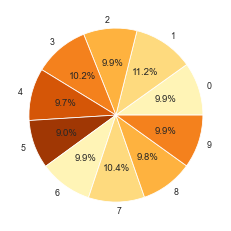

In [15]:
## MNIST-Dataset

from MultiClassSVM import *
import matplotlib.pyplot as plt 
from DataLoader import *
import seaborn as sns
sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set_context('paper')
sns.set_palette("YlOrBr")

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_mnist()

counts = dict()
for x in np.unique(ytrain).astype(int):
    counts[x] = np.count_nonzero(ytrain == x)

plt.pie(x=counts.values(), labels=counts.keys(), autopct='%1.1f%%')
plt.show() # roughly balanced data set

  0%|          | 0/600 [00:00<?, ?it/s]
Epoch: 1 / 2 ... 
  0%|          | 0/600 [00:00<?, ?it/s]
Epoch: 2 / 2 ... 
100%|██████████| 2/2 [01:45<00:00, 52.64s/it]


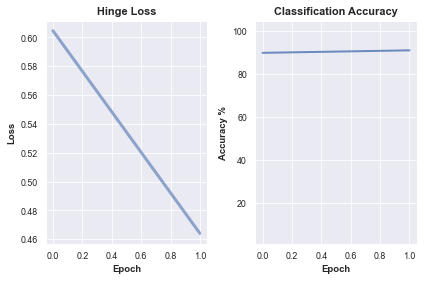

In [2]:
import matplotlib.pyplot as plt 
from DataLoader import *
from MultiClassSVM import *

import seaborn as sns
sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set_context('paper')

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_mnist()

mc_svm = MultiClassSVM(lr=0.5, C=0.01, max_iters=2, batch_size=100)
mc_svm.fit(xtrain, ytrain)

plt.subplot(1,2,1)
plt.title("Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(mc_svm.losses, lw=3, alpha=0.6)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(mc_svm.accuracies * 100, lw=2, alpha=0.8)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")
plt.ylim(min(mc_svm.accuracies), 105)

plt.tight_layout()
plt.show()

In [3]:
from MultiClassSVM import *
import matplotlib.pyplot as plt 
from DataLoader import *

# split 10.000 samples off xtrain and do hyperparameter-search using this validation set
indices = np.random.permutation(len(ytrain))
xtrain = xtrain[indices]
ytrain = ytrain[indices]

x_val = xtrain[:10**4]; y_val = ytrain[:10**4]
xtrain = xtrain[10**4:]; ytrain = ytrain[10**4:]

lrs = [0.01, 0.1, 0.5]; Cs = [0.01, 0.1, 0.5]
batch_sizes = [50, 100, 200]

results = {}

for lr in tqdm(lrs):
    for C in Cs:
        for batch in batch_sizes:
            mc_svm = MultiClassSVM(lr=lr, C=C, batch_size=batch, max_iters=1)
            mc_svm.fit(xtrain, ytrain)
            results[f'lr:{lr}, C:{C}, batch:{batch}'] = mc_svm.accuracy(np.c_[x_val, np.ones(xtest.shape[0])], y_val)

results = sorted(results.items(), key=lambda l:l[1], reverse=True)
print(results[:5])

# best hyperparameters
lr = 0.5; C = 0.01
mc_svm = MultiClassSVM(lr=lr, C=C, batch_size=200, max_iters=1)
mc_svm.fit(xtrain, ytrain)

# classification accuracy
print(mc_svm.accuracy(np.c_[xtest, np.ones(xtest.shape[0])], ytest))

  0%|          | 0/1000 [00:00<?, ?it/s]
Epoch: 1 / 1 ... 
100%|██████████| 1000/1000 [00:42<00:00, 23.71it/s]

100%|██████████| 1/1 [00:48<00:00, 48.16s/it]

  0%|          | 0/500 [00:00<?, ?it/s]
Epoch: 1 / 1 ... 
100%|██████████| 500/500 [00:48<00:00, 10.34it/s]

100%|██████████| 1/1 [00:54<00:00, 54.70s/it]

  0%|          | 0/250 [00:00<?, ?it/s]
Epoch: 1 / 1 ... 
100%|██████████| 250/250 [00:47<00:00,  5.22it/s]

100%|██████████| 1/1 [00:54<00:00, 54.09s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]
Epoch: 1 / 1 ... 
100%|██████████| 1000/1000 [00:42<00:00, 23.55it/s]

100%|██████████| 1/1 [00:48<00:00, 48.13s/it]

  0%|          | 0/500 [00:00<?, ?it/s]
Epoch: 1 / 1 ... 
100%|██████████| 500/500 [00:41<00:00, 12.16it/s]

100%|██████████| 1/1 [00:46<00:00, 46.78s/it]

  0%|          | 0/250 [00:00<?, ?it/s]
Epoch: 1 / 1 ... 
100%|██████████| 250/250 [00:41<00:00,  6.10it/s]

100%|██████████| 1/1 [00:46<00:00, 46.52s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]
Epoch: 1 / 1 ... 